In [92]:
#Libraries used in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import f1_score

In [2]:
data = pd.read_excel("Dry_Bean_Dataset.xlsx")

In [3]:
data.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER


# --Data Exploration--

In [4]:
data.shape

(13611, 17)

# 1.Number of Null values

In [5]:
# Number of Null values per Feature
data.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

# 2. Balance of classes

Text(0.5, 1.0, 'Frequency of classes in dataset')

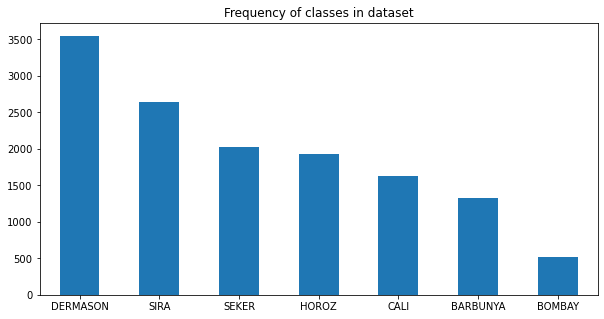

In [6]:
#Checking balace of Dataset
data["Class"].value_counts().plot.bar(width = 0.5, figsize = (10, 5))
plt.xticks(rotation=0)
plt.title("Frequency of classes in dataset")
#plt.savefig("Frequency_of_classes_in_dataset.jpg", dpi = 500)

In [7]:
# Statistical distribution of features of dry bean varieties (in pixels).
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


# 3. Correlation

In [8]:
# Pearson Correlation is used
# set.precision() is for limiting digit precision
data.corr().style.background_gradient(cmap='Blues').set_precision(2)

/var/folders/tp/w8jcl2y132931hn11385q6kh0000gn/T/ipykernel_16927/3523593568.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.corr().style.background_gradient(cmap='Blues').set_precision(2)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.00,0.97,0.93,0.95,0.24,0.27,1.00,0.98,0.05,-0.20,-0.36,-0.27,-0.85,-0.64,-0.27,-0.36
Perimeter,0.97,1.00,0.98,0.91,0.39,0.39,0.97,0.99,-0.02,-0.30,-0.55,-0.41,-0.86,-0.77,-0.41,-0.43
MajorAxisLength,0.93,0.98,1.00,0.83,0.55,0.54,0.93,0.96,-0.08,-0.28,-0.60,-0.57,-0.77,-0.86,-0.57,-0.48
MinorAxisLength,0.95,0.91,0.83,1.00,-0.01,0.02,0.95,0.95,0.15,-0.16,-0.21,-0.02,-0.95,-0.47,-0.02,-0.26
AspectRation,0.24,0.39,0.55,-0.01,1.00,0.92,0.24,0.30,-0.37,-0.27,-0.77,-0.99,0.02,-0.84,-0.98,-0.45
Eccentricity,0.27,0.39,0.54,0.02,0.92,1.00,0.27,0.32,-0.32,-0.30,-0.72,-0.97,0.02,-0.86,-0.98,-0.45
ConvexArea,1.00,0.97,0.93,0.95,0.24,0.27,1.00,0.99,0.05,-0.21,-0.36,-0.27,-0.85,-0.64,-0.27,-0.36
EquivDiameter,0.98,0.99,0.96,0.95,0.30,0.32,0.99,1.00,0.03,-0.23,-0.44,-0.33,-0.89,-0.71,-0.33,-0.39
Extent,0.05,-0.02,-0.08,0.15,-0.37,-0.32,0.05,0.03,1.00,0.19,0.34,0.35,-0.14,0.24,0.35,0.15
Solidity,-0.20,-0.30,-0.28,-0.16,-0.27,-0.30,-0.21,-0.23,0.19,1.00,0.61,0.30,0.15,0.34,0.31,0.70


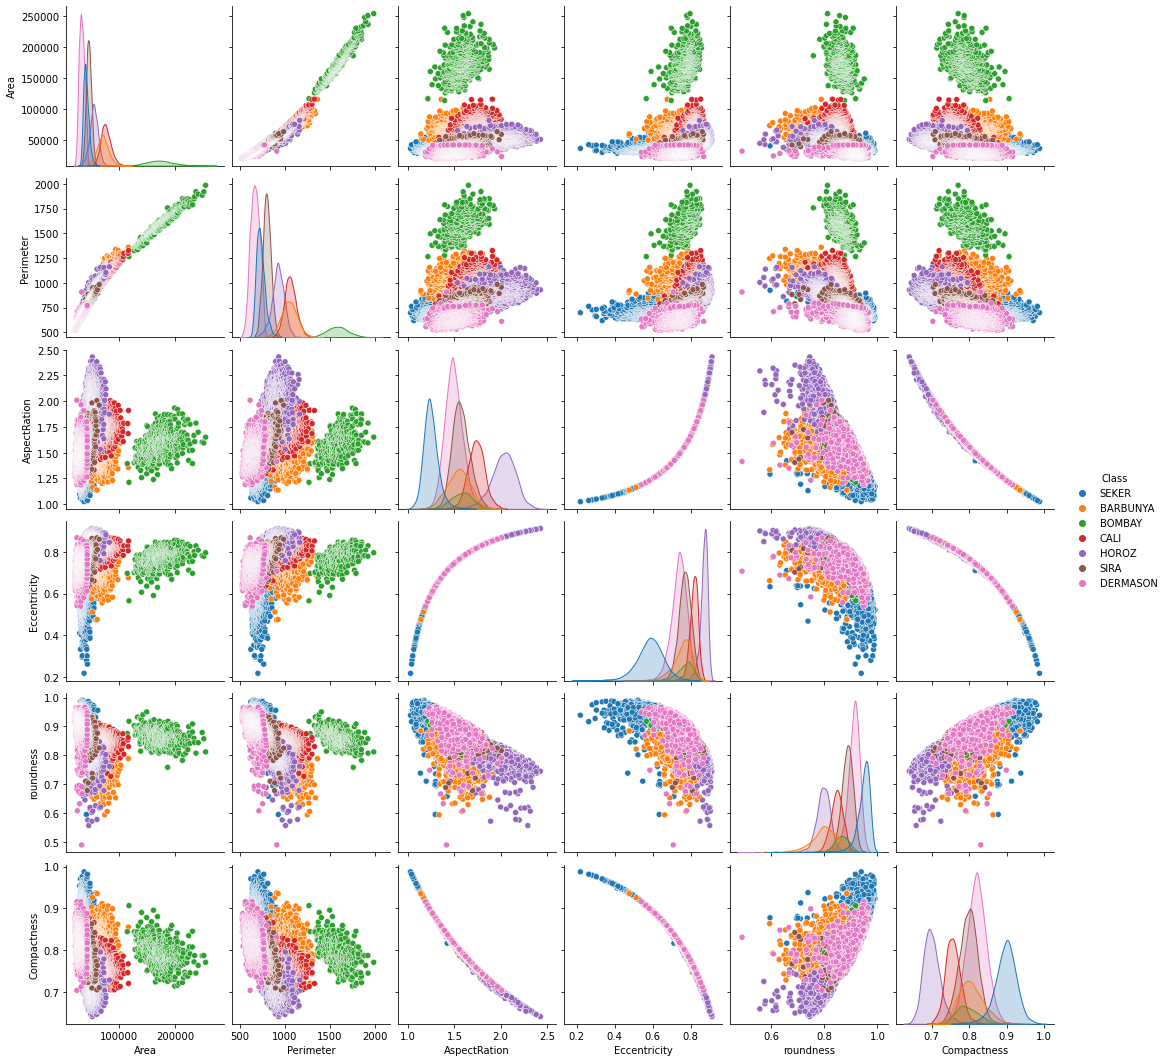

In [9]:
#From the figures we can understand which Classification model can be suitable for our dataset
sns.pairplot(data[["Area","Perimeter","AspectRation","Eccentricity","roundness","Compactness","Class"]], hue="Class")
#plt.savefig("Pairplot.jpg", dpi = 500)

# --Data Preparation--

# 1.Application of Standard Scaler

In [18]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['Class']))

In [19]:
data_scaled

array([[-0.84074853, -1.1433189 , -1.30659814, ...,  2.40217287,
         1.92572347,  0.83837103],
       [-0.82918764, -1.01392388, -1.39591111, ...,  3.10089314,
         2.68970162,  0.77113842],
       [-0.80715717, -1.07882906, -1.25235661, ...,  2.23509147,
         1.84135576,  0.91675514],
       ...,
       [-0.37203825, -0.44783294, -0.45047814, ...,  0.28920441,
         0.33632829,  0.39025114],
       [-0.37176543, -0.42702856, -0.42897404, ...,  0.22837538,
         0.2489734 ,  0.03644001],
       [-0.37135619, -0.38755718, -0.2917356 , ..., -0.12777587,
        -0.2764814 ,  0.71371948]])

In [20]:
scaler.mean_

array([5.30482845e+04, 8.55283459e+02, 3.20141867e+02, 2.02270714e+02,
       1.58324198e+00, 7.50894929e-01, 5.37682002e+04, 2.53064220e+02,
       7.49732787e-01, 9.87142844e-01, 8.73281831e-01, 7.99863682e-01,
       6.56360851e-03, 1.71594733e-03, 6.43590181e-01, 9.95063312e-01])

[Text(0.5, 0, 'Scale'), Text(0, 0.5, 'Features')]

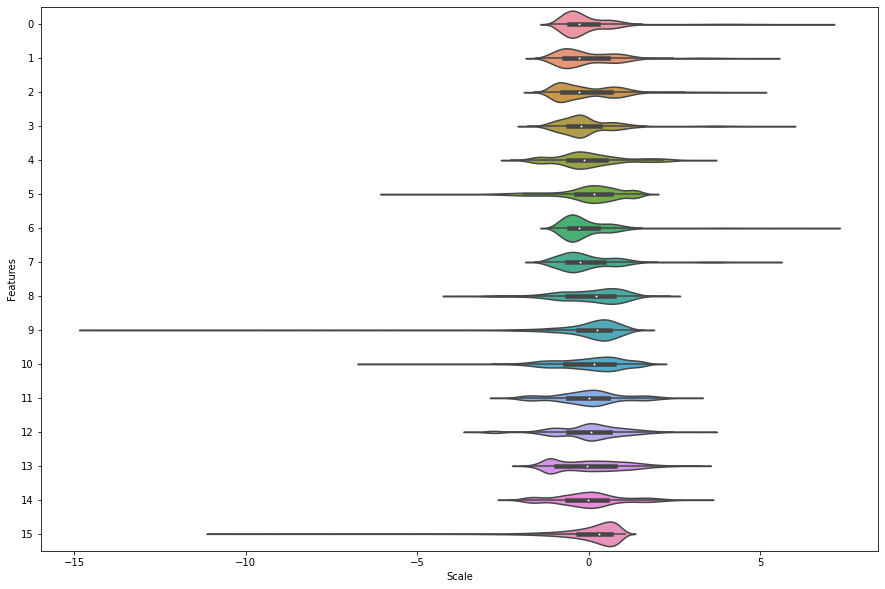

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(data = data_scaled, orient = "h")
ax.set(xlabel="Scale", ylabel = "Features")
#plt.savefig("Violinplot.jpg", dpi = 500)

In [23]:
data_scaled.shape

(13611, 16)

# 2. PCA

In [24]:
pca = PCA(6)
data_pca = pca.fit_transform(data_scaled) 

In [25]:
data_pca.shape

(13611, 6)

In [26]:
data_pca

array([[-4.98156099,  1.82469731,  0.74902104, -0.39081166, -0.03353132,
         0.30121225],
       [-5.43679225,  2.9323648 ,  2.18237398, -0.43195954,  1.22646417,
         0.04557491],
       [-4.7580883 ,  1.82688385,  0.5140376 , -0.1258538 ,  0.13150554,
         0.2085379 ],
       ...,
       [-1.41751472,  0.1411937 , -0.38720635, -0.48643868, -0.38355528,
        -0.13733302],
       [-1.11466584, -0.21267932,  0.14408831, -0.84190323, -0.48680458,
        -0.09716026],
       [-0.76643686, -0.64651411, -0.99412157,  0.81467905,  0.25825818,
         0.05216271]])

Text(0.5, 0, 'Principal component index')

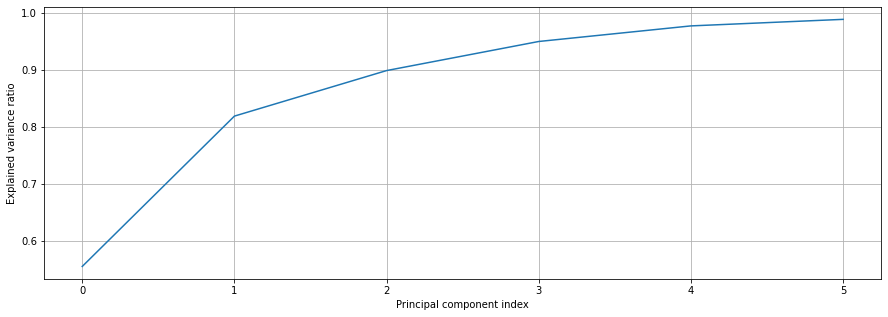

In [27]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.grid(True)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
#plt.savefig("Violinplot.jpg", dpi = 500)

In [28]:
pca.n_components_

6

In [29]:
y = data['Class']

In [31]:
y.shape

(13611,)

# --Model Selection--

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data_pca, y, shuffle = True, random_state = 2222, test_size = 0.2)

# 1. Decision Tree Classifier

In [33]:
imba_pipeline_dtc = make_pipeline(SMOTE(random_state=42), 
                              DecisionTreeClassifier())

multi_recall = make_scorer(recall_score, average="micro")

cross_val_score(imba_pipeline_dtc, X_train, y_train, scoring=multi_recall, cv=10).mean()

0.8908889192729432

In [34]:
DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [35]:
param_grid = {'decisiontreeclassifier__max_features': ['auto', 'sqrt', 'log2'],
              'decisiontreeclassifier__ccp_alpha': [0.1, .01, .001],
              'decisiontreeclassifier__max_depth' : [5, 6, 7, 8, 9],
              'decisiontreeclassifier__criterion' :['gini', 'entropy']
             }

grids_dtc = GridSearchCV(imba_pipeline_dtc, param_grid=param_grid, n_jobs = -1, verbose = 2, cv = 10) 
grids_dtc.fit(X_train, y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__ccp_alpha': [0.1, 0.01,
                                                               0.001],
                         'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [5, 6, 7, 8, 9],
                         'decisiontreeclassifier__max_features': ['auto',
                                                                  'sqrt',
                                                                  'log2']},
             verbose=2)

In [36]:
grids_dtc.best_params_

{'decisiontreeclassifier__ccp_alpha': 0.001,
 'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 9,
 'decisiontreeclassifier__max_features': 'log2'}

In [37]:
y_pred_dtc = grids_dtc.best_estimator_.predict(X_test)

In [38]:
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)

In [39]:
accuracy_dtc

0.8670583914799853

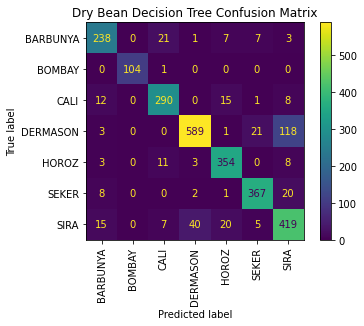

In [44]:
# Displaying Results in Confusion Matrix
plot_confusion_matrix(grids_dtc, X_test, y_test)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Decision Tree Confusion Matrix')
plt.show()  


In [45]:
# Building classification report for the results from the Decision Tree Classifier
reportDT = classification_report(y_test, y_pred_dtc, output_dict=True)
reportdfDT = pd.DataFrame(reportDT).transpose()
reportdfDT

,precision,recall,f1-score,support
BARBUNYA,0.853047,0.859206,0.856115,277.000000
BOMBAY,1.000000,0.990476,0.995215,105.000000
CALI,0.878788,0.889571,0.884146,326.000000
DERMASON,0.927559,0.804645,0.861741,732.000000
HOROZ,0.889447,0.934037,0.911197,379.000000
SEKER,0.915212,0.922111,0.918648,398.000000
SIRA,0.727431,0.828063,0.774492,506.000000
accuracy,0.867058,0.867058,0.867058,0.867058
macro avg,0.884498,0.889730,0.885936,2723.000000
weighted avg,0.872636,0.867058,0.867986,2723.000000


# 2. Random Forest Classifier

In [46]:
imba_pipeline_rfc = make_pipeline(SMOTE(random_state=42), 
                                RandomForestClassifier(n_estimators=100, random_state=13))

multi_recall = make_scorer(recall_score, average="micro")

cross_val_score(imba_pipeline_rfc, X_train, y_train, scoring=multi_recall, cv=10).mean()

0.9213815967158213

In [47]:
param_grid = [
  {'randomforestclassifier__n_estimators': [50, 100, 200],
 'randomforestclassifier__max_depth': [4, 6, 10, 12],
 'randomforestclassifier__random_state': [13]} 
 ]

grids_rfc = GridSearchCV(imba_pipeline_rfc, param_grid=param_grid, n_jobs = -1, verbose = 2, cv = 10) 
grids_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             n_jobs=-1,
             param_grid=[{'randomforestclassifier__max_depth': [4, 6, 10, 12],
                          'randomforestclassifier__n_estimators': [50, 100,
                                                                   200],
                          'randomforestclassifier__random_state': [13]}],
             verbose=2)

In [48]:
grids_rfc.best_score_

0.9228504969480905

In [49]:
grids_rfc.best_params_

{'randomforestclassifier__max_depth': 12,
 'randomforestclassifier__n_estimators': 200,
 'randomforestclassifier__random_state': 13}

In [50]:
y_pred_rfc = grids_rfc.best_estimator_.predict(X_test)

In [51]:
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)

In [52]:
accuracy_rfc

0.9181050312155711

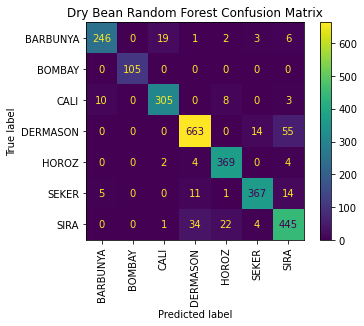

<Figure size 432x288 with 0 Axes>

In [54]:
# Displaying Results in Confusion Matrix
plot_confusion_matrix(grids_rfc, X_test, y_test)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Random Forest Confusion Matrix')
plt.show()  
plt.savefig("Random_Forest_Confusion:.jpg", dpi = 500)

In [88]:
# Building classification report for the results from the Random Forest classifier
reportRF = classification_report(y_test, y_pred_rfc, output_dict=True)
reportdfRF = pd.DataFrame(reportRF).transpose()
reportdfRF

,precision,recall,f1-score,support
BARBUNYA,0.942529,0.888087,0.914498,277.000000
BOMBAY,1.000000,1.000000,1.000000,105.000000
CALI,0.932722,0.935583,0.934150,326.000000
DERMASON,0.929874,0.905738,0.917647,732.000000
HOROZ,0.917910,0.973615,0.944942,379.000000
SEKER,0.945876,0.922111,0.933842,398.000000
SIRA,0.844402,0.879447,0.861568,506.000000
accuracy,0.918105,0.918105,0.918105,0.918105
macro avg,0.930473,0.929226,0.929521,2723.000000
weighted avg,0.918997,0.918105,0.918223,2723.000000


# 3. KNN Classifier

In [56]:
imba_pipeline_KNN = make_pipeline(SMOTE(random_state=42), 
                                KNeighborsClassifier())

multi_recall = make_scorer(recall_score, average="micro")

cross_val_score(imba_pipeline_KNN, X_train, y_train, scoring=multi_recall, cv=10).mean()

0.9181668793550479

In [57]:
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [58]:
param_grid_KNN = [{"kneighborsclassifier__n_neighbors" : [3,5,7,9,11,13,15], 
                   "kneighborsclassifier__weights" : ["uniform", "distance"]}
             ]

grids_knn = GridSearchCV(imba_pipeline_KNN, param_grid=param_grid_KNN, n_jobs = -1, verbose = 2, cv = 10) 
grids_knn.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11,
                                                                13, 15],
                          'kneighborsclassifier__weights': ['uniform',
                                                            'distance']}],
             verbose=2)

In [59]:
grids_knn.best_score_

0.9234937105007294

In [65]:
grids_knn.best_params_

{'kneighborsclassifier__n_neighbors': 11,
 'kneighborsclassifier__weights': 'uniform'}

In [60]:
y_pred_knn = grids_knn.best_estimator_.predict(X_test)

In [61]:
accuracy_knn =accuracy_score(y_test, y_pred_knn)

In [62]:
accuracy_knn

0.9122291590157914

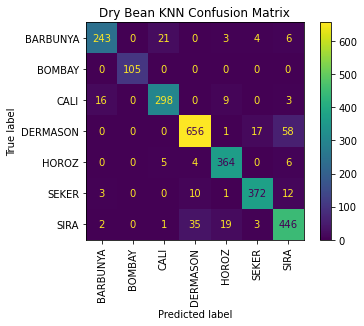

In [63]:
# Displaying Results in Confusion Matrix
plot_confusion_matrix(grids_knn, X_test, y_test)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean KNN Confusion Matrix')
plt.show()  

In [89]:
# Building classification report for the results from the KNN Classifier
reportKNN = classification_report(y_test, y_pred_knn, output_dict=True)
reportdfKNN = pd.DataFrame(reportKNN).transpose()
reportdfKNN

,precision,recall,f1-score,support
BARBUNYA,0.920455,0.877256,0.898336,277.000000
BOMBAY,1.000000,1.000000,1.000000,105.000000
CALI,0.916923,0.914110,0.915515,326.000000
DERMASON,0.930496,0.896175,0.913013,732.000000
HOROZ,0.916877,0.960422,0.938144,379.000000
SEKER,0.939394,0.934673,0.937028,398.000000
SIRA,0.839925,0.881423,0.860174,506.000000
accuracy,0.912229,0.912229,0.912229,0.912229
macro avg,0.923438,0.923437,0.923173,2723.000000
weighted avg,0.913104,0.912229,0.912363,2723.000000


# 4. SVM Classifier

In [66]:
imba_pipeline_svm = make_pipeline(SMOTE(random_state=42), 
                                svm.SVC())

multi_recall = make_scorer(recall_score, average="micro")

cross_val_score(imba_pipeline_svm, X_train, y_train, scoring=multi_recall, cv=10).mean()

0.9269826439528981

In [67]:
svm.SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [68]:
param_grid_svm =[ {'svc__C': [1, 10], 
          'svc__gamma': [0.001, 0.01, 1]}
                ]

grids_svm= GridSearchCV(imba_pipeline_svm, param_grid=param_grid_svm, n_jobs = -1, verbose = 2, cv = 10) 
grids_svm.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid=[{'svc__C': [1, 10], 'svc__gamma': [0.001, 0.01, 1]}],
             verbose=2)

In [69]:
grids_svm.best_score_

0.9270746401177551

In [87]:
grids_svm.best_params_

{'svc__C': 10, 'svc__gamma': 0.01}

In [71]:
y_pred_svm = grids_svm.best_estimator_.predict(X_test)

In [72]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [73]:
accuracy_svm

0.9265515975027543

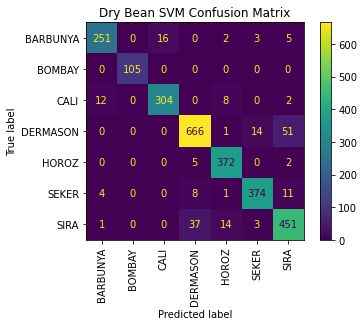

In [74]:
# Displaying Results in Confusion Matrix
plot_confusion_matrix(grids_svm, X_test, y_test)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean SVM Confusion Matrix')
plt.show() 

In [90]:
# Building classification report for the results from the SVM Classifier
reportSVM = classification_report(y_test, y_pred_svm, output_dict=True)
reportdfSVM = pd.DataFrame(reportSVM).transpose()
reportdfSVM

,precision,recall,f1-score,support
BARBUNYA,0.936567,0.906137,0.921101,277.000000
BOMBAY,1.000000,1.000000,1.000000,105.000000
CALI,0.950000,0.932515,0.941176,326.000000
DERMASON,0.930168,0.909836,0.919890,732.000000
HOROZ,0.934673,0.981530,0.957529,379.000000
SEKER,0.949239,0.939698,0.944444,398.000000
SIRA,0.863985,0.891304,0.877432,506.000000
accuracy,0.926552,0.926552,0.926552,0.926552
macro avg,0.937804,0.937289,0.937367,2723.000000
weighted avg,0.927002,0.926552,0.926589,2723.000000


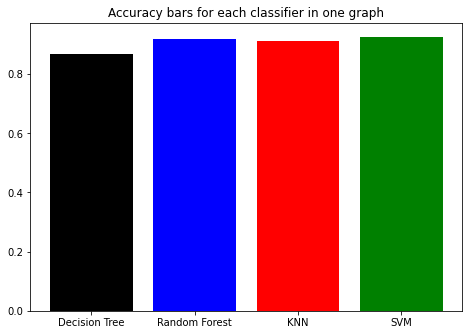

<Figure size 432x288 with 0 Axes>

In [86]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classifiers = ['Decision Tree', 'Random Forest', 'KNN', 'SVM']
accuracy = [accuracy_dtc,accuracy_rfc,accuracy_knn,accuracy_svm]
ax.bar(classifiers,accuracy, color=['black', 'blue', 'red', 'green'])
plt.title('Accuracy bars for each classifier in one graph')
plt.show()